In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

<h1>READ DATA</h1>
<p>The data is in csv format, therfore the <b>Pandas.read_csv</b> function will be used to read the csv file</p>

In [2]:
path = r"StudentsPerformance.csv"
student_data = pd.read_csv(path, delimiter=',')

In [3]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Available columns in the data are:

In [4]:
i = 1
print(f"{'':<3} |","column names")
print("-"*50)
for column in student_data.columns:
    print(f"{i: <3} | {column: <25}")
    i+=1

    | column names
--------------------------------------------------
1   | gender                   
2   | race/ethnicity           
3   | parental level of education
4   | lunch                    
5   | test preparation course  
6   | math score               
7   | reading score            
8   | writing score            


<h3>Data Description</h3>

In [5]:
student_data.describe(include= "all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h2>Finding Missing Values in our data</h2>

In [7]:
student_data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [8]:
#sum up the total number of missing values in each column
student_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<p>
    Since we are more concerned on where a student will fail or pass,
    overal score will be generated from averaging the sum of the math,
    reading and score
</p>

In [9]:
student_data['average score'] = (student_data['math score'] + student_data['reading score'] + student_data['writing score'])/3

In [10]:
#View the dataframe to see the newly added column - "average score"
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<p>
    <br>
    <br>
    Since the math, reading and writing column is no longer need, 
    we will be droping them from the table
</p>

In [11]:
col_to_drop = ['math score', 'reading score', 'writing score']
for col in col_to_drop:
    student_data = student_data.drop(col, axis= 1)
    
student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.000000
996,male,group C,high school,free/reduced,none,57.333333
997,female,group C,high school,free/reduced,completed,65.000000
998,female,group D,some college,standard,completed,74.333333


<a id="ref8"></a>
# Indicator variable (or dummy variable)
**What is an indicator variable?**
<div>An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. </div>


In [12]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'average score'],
      dtype='object')

In [13]:
column_to_categorize = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']
for column in column_to_categorize:
    student_data[column] = student_data[column].astype('category')
    
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'average score'],
      dtype='object')

In [14]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   average score                1000 non-null   float64 
dtypes: category(5), float64(1)
memory usage: 13.5 KB


<p>
    <br><br>
    <b>Initiate creation of dummy variable</b>
</p>

In [15]:
dummy_student_data = pd.get_dummies(student_data[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']])
dummy_student_data.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


<p>
    Combine tables:
</p>

In [16]:
student_data = pd.concat([student_data, dummy_student_data], axis=1)
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'average score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [17]:
#Drop original columns from table
column_to_drop = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']
for col in column_to_drop:
    student_data.drop(col, axis= 1, inplace= True)
    
student_data.columns

Index(['average score', 'gender_female', 'gender_male',
       'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [18]:
#Average score column
student_data['average score'] = np.where(student_data['average score'] > 40, 1, 0)

#rename average score column to result
student_data.rename(columns={'average score' : 'pass'}, inplace= True)

student_data.head()
    

,pass,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [19]:
student_data['pass'].value_counts()

1    968
0     32
Name: pass, dtype: int64

In [20]:
%matplotlib inline

In [21]:
success, failure = student_data['pass'].value_counts()

In [22]:
plot_data = list((success, failure))

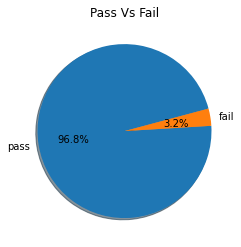

In [23]:
plt.pie(plot_data, labels = ['pass', 'fail'], autopct='%1.1f%%' ,startangle=15, shadow = True)
plt.title('Pass Vs Fail')
plt.show()

C:\Users\Jesus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


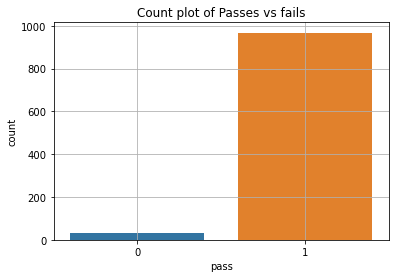

In [24]:
sns.countplot(student_data['pass'])
plt.title('Count plot of Passes vs fails')
plt.grid()
plt.show()

<div>
    <h1>Import Libraries to train data</h1>
    <p>
        <ul>
            <li>Scikit Learn Library</li>
    </ul>
    </p>
</div>

In [25]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier

<h2> Split Data into train and test parts</h2>

In [26]:
student_data.columns

Index(['pass', 'gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [27]:
features = student_data[['gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']]

target = student_data['pass']

In [28]:
features.shape, target.shape

((1000, 17), (1000,))

In [29]:
features_train, features_test, target_train, target_test = tts(features, target, test_size= 0.2, random_state = 1)

In [30]:
for data, label in zip([features_train, features_test, target_train, target_test], ['Xtrain', 'Xtest', 'ytrain', 'ytest']):
    print(f"The shape of {label: <6} is {data.shape:}")

The shape of Xtrain is (800, 17)
The shape of Xtest  is (200, 17)
The shape of ytrain is (800,)
The shape of ytest  is (200,)


<br><p>initiate the model</p>

In [31]:
classifier = RandomForestClassifier(n_estimators= 100)

In [32]:
# Train the model
classifier.fit(features_train, target_train)

RandomForestClassifier()

In [33]:
# Make prediction on test data

prediction = classifier.predict(features_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [34]:
# Calculate Model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(target_test, prediction))

Accuracy: 0.955


<div>
    <p>
        From the above, we have obtained an accuracy of 96%
    
        <br>
    <br>
        Let's take a look at which feature has great importance on this prediction
    </p>
</div>

In [35]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(features.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
9,parental level of education_high school,0.090737
12,parental level of education_some high school,0.089935
3,race/ethnicity_group B,0.087158
5,race/ethnicity_group D,0.074867
11,parental level of education_some college,0.069543
1,gender_male,0.065874
6,race/ethnicity_group E,0.059429
0,gender_female,0.059424
4,race/ethnicity_group C,0.056825
13,lunch_free/reduced,0.053314


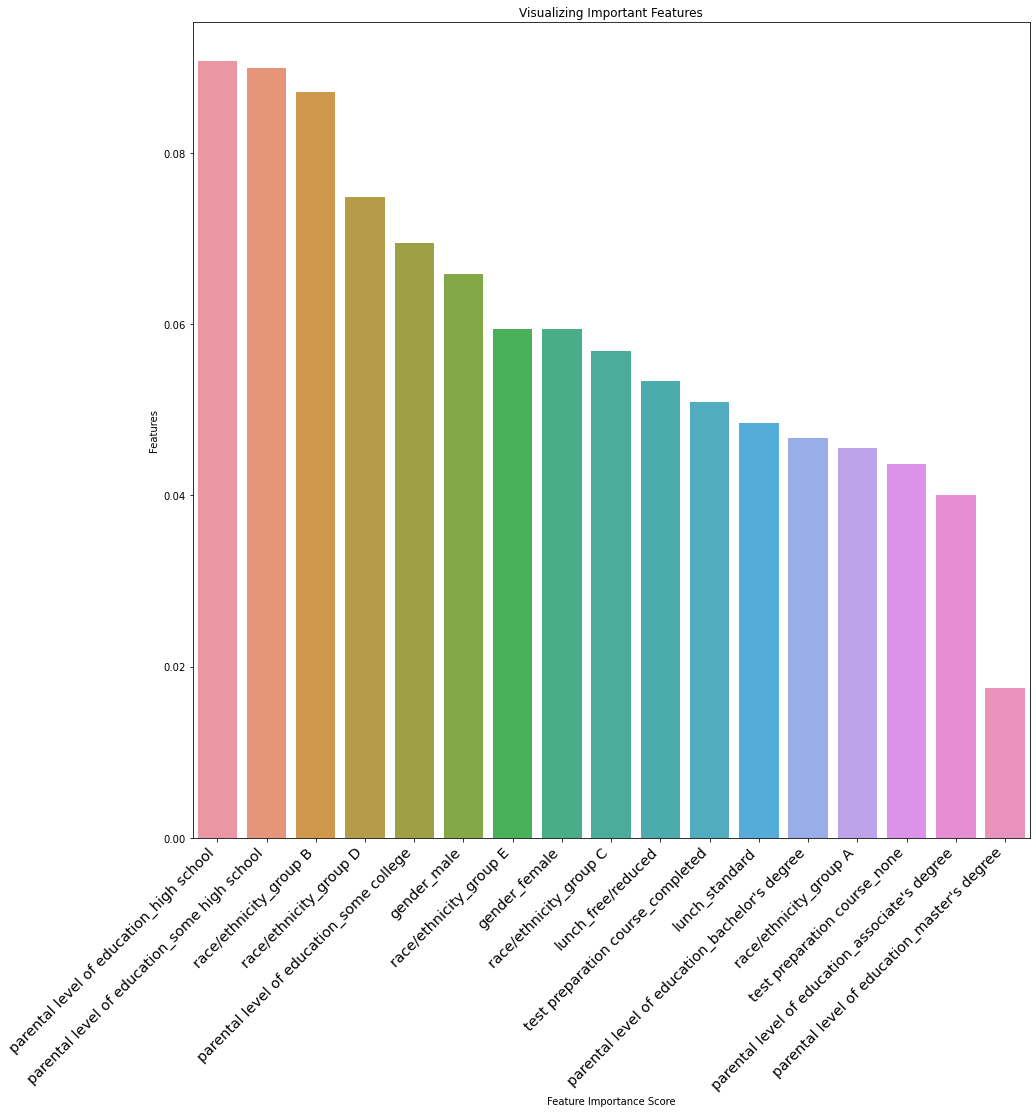

In [36]:
# visualize important featuers
plt.figure(figsize=(15, 15))
# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

<p>
    From the above we can see that parental levelOf education,masters degree has low importance
    and does not contribute much to the prediction.
    
    So, let's drop it from out data, and retrain the model
</p>

In [37]:
#Drop column-
student_data.drop(student_data["parental level of education_master's degree"], axis= 1, inplace= True)



KeyError: '[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0\n 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0\n 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0\n 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0\n 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1\n 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0\n 0] not found in axis'

In [38]:
#Get feature columns
features = student_data[['gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']]

target = student_data['pass']

In [39]:
features_train, features_test, target_train, target_test = tts(features, target, test_size= 0.2, random_state = 1)

In [40]:
for data, label in zip([features_train, features_test, target_train, target_test], ['Xtrain', 'Xtest', 'ytrain', 'ytest']):
    print(f"The shape of {label: <6} is {data.shape:}")

The shape of Xtrain is (800, 16)
The shape of Xtest  is (200, 16)
The shape of ytrain is (800,)
The shape of ytest  is (200,)


In [41]:
classifier = RandomForestClassifier(n_estimators= 100)

# Train the model
classifier.fit(features_train, target_train)

#Make prediction on test data

prediction = classifier.predict(features_test)

In [42]:
# Calculate Model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(target_test, prediction))

Accuracy: 0.955


<p>
Removal of the less important feature has no or little effect on our prediction</p>

<div>
<p>
Save the model as a pickle object for deployment
</p>
</div>

In [43]:
with open("model.pkl", "wb") as file_object:
    pickle.dump(classifier, file_object)
    print("File saved")

File saved


In [52]:
str(classifier.predict(np.array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]).reshape(1, -1)))

'[1]'